Норма ошибки: 7.238402099907226e-05


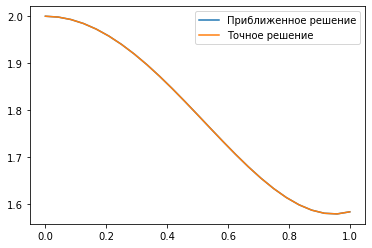

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# X=1, T=1, a=1, tau = h^2 / 6

def solve_equation(N, f, u0, u_l, u_r):
    grid = np.linspace(0, 1, N)
    h = 1 / (N - 1)
    tau = h ** 2 / 6
    n = 1
    y0 = []
    for x in grid:
        y0.append(u0(x))
    while n * tau <= 1:
        y1 = [u_l(n * tau)]
        for j in range(1, N - 1):
            y1.append(tau / h ** 2 * (y0[j - 1] + y0[j + 1]) - (2 * tau / h ** 2 - 1) * y0[j] + tau * f(grid[j], tau * n) + tau ** 2 / (2 * h ** 2) * (f(grid[j - 1], tau * n) - 2 * f(grid[j], tau * n) + f(grid[j + 1], tau * n)) + tau/2* (f(grid[j], tau*(n+1)) - f(grid[j], tau * n)))
        y1.append(u_r(n * tau))
        y0 = y1.copy()
        n += 1
    return y0


def get_error(f1, f2):
    errors = []
    for i in range(len(f1)):
        errors.append(np.abs(f1[i]-f2[i]))
    return np.max(errors)


Nx = 25
x_points = np.linspace(0, 1, Nx)
u = lambda x: np.cos(2*x) + x**2 + 1
u_points = []
for x in x_points:
    u_points.append(u(x))
y_points = solve_equation(N=Nx, f=lambda x, t: 2*(t-1)+4*np.cos(2*x), u0=lambda x: np.cos(2*x) + x**2, u_l=lambda t: 1 + t**2, u_r=lambda t: np.cos(2) + 1 + t**2)

print("Норма ошибки:", get_error(y_points, u_points))
plt.plot(x_points, y_points, label='Приближенное решение')
plt.plot(x_points, u_points, label='Точное решение')
plt.legend()
plt.show()


Норма ошибки: 0.00024233576854348904


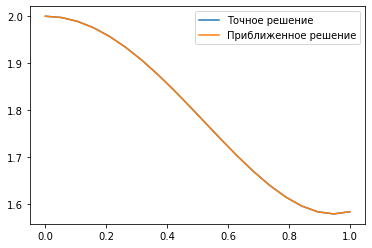

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# X=1, T=1, a=1
def solve_system(A, b):
    N = len(b)
    alpha = np.zeros(N - 1)
    beta = np.zeros(N - 1)
    beta[0] = b[0]
    alpha[0] = 0
    for i in range(1, N - 1):
        alpha[i] = -A[2] / (A[0] * alpha[i - 1] + A[1])
        beta[i] = (b[i] - A[0] * beta[i - 1]) / (A[0] * alpha[i - 1] + A[1])
    y = np.zeros(N)
    y[N - 1] = b[N - 1]
    for i in range(N - 2, -1, -1):
        y[i] = alpha[i] * y[i + 1] + beta[i]
    return y


def solve_equation(N, M, f, u0, u_l, u_r, sigma=-1/2):
    x = np.linspace(0, 1, N)
    t = np.linspace(0, 1, M)
    h = 1 / (N - 1)
    tau = 1 / (M - 1)
    y0 = []
    for x_p in x:
        y0.append(u0(x_p))
    A = [-1/(2*h**2), 1/h**2 + 1/tau, -1/(2*h**2)]
    b = [u_l(t[1])]
    for j in range(1, len(x)-1):
        b.append(1/(2*h**2)*(y0[j-1] - 2*y0[j] + y0[j+1]) + y0[j]/tau + (f(x[j], t[1]) + f(x[j], t[0]))/2)
    b.append(u_r(t[1]))
    y1 = solve_system(A, b)
    for n in range(2, M):
        A = [-1/h**2, 2/h**2 + 1/tau - sigma/tau, -1/h**2]
        b = [u_l(t[n])]
        for j in range(1, N - 1):
            b.append(y1[j]*(1/tau-2*sigma/tau) + y0[j]*sigma/tau + f(x[j], t[n]))
        b.append(u_r(t[n]))
        y2 = solve_system(A, b)
        y0 = y1.copy()
        y1 = y2.copy()
    return y1


def get_error(f1, f2):
    errors = []
    for i in range(len(f1)):
        errors.append(np.abs(f1[i]-f2[i]))
    return np.max(errors)


Nx = 20
Mt = 10
x_points = np.linspace(0, 1, Nx)
u = lambda x: np.cos(2*x) + x**2 + 1
u_points = []
for x in x_points:
    u_points.append(u(x))

y_points = solve_equation(N=Nx, M=Mt, f=lambda x, t: 2*(t-1)+4*np.cos(2*x), u0=lambda x: np.cos(2*x) + x**2,
                          u_l=lambda t: 1 + t**2, u_r=lambda t: np.cos(2) + 1 + t**2, sigma=-1/2)


print("Норма ошибки:", get_error(y_points, u_points))
plt.plot(x_points, y_points, label='Точное решение')
plt.plot(x_points, u_points, label='Приближенное решение')
plt.legend()
plt.show()

Норма ошибки: 0.00011642862006544519


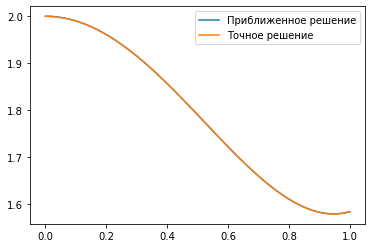

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# X=1, T=1, a=1
def get_error(f1, f2):
    errors = []
    for i in range(len(f1)):
        errors.append(np.abs(f1[i] - f2[i]))
    return np.max(errors)


def solve_system(A, b):
    N = len(b)
    alpha = np.zeros(N - 1)
    beta = np.zeros(N - 1)
    beta[0] = b[0]
    alpha[0] = 0
    for i in range(1, N - 1):
        alpha[i] = -A[2] / (A[0] * alpha[i - 1] + A[1])
        beta[i] = (b[i] - A[0] * beta[i - 1]) / (A[0] * alpha[i - 1] + A[1])
    y = np.zeros(N)
    y[N - 1] = b[N - 1]
    for i in range(N - 2, -1, -1):
        y[i] = alpha[i] * y[i + 1] + beta[i]
    return y


def solve_equation(N, M, f, u0, u_l, u_r):
    x = np.linspace(0, 1, N)
    t = np.linspace(0, 1, M)
    h = 1 / (N - 1)
    tau = 1 / (M - 1)
    y0 = []
    for x_p in x:
        y0.append(u0(x_p))
    A = [-1/(2*h**2), 1/h**2 + 1/tau, -1/(2*h**2)]
    b = [u_l(t[1])]
    for j in range(1, len(x)-1):
        b.append(1/(2*h**2)*(y0[j-1] - 2*y0[j] + y0[j+1]) + y0[j]/tau + (f(x[j], t[1]) + f(x[j], t[0]))/2)
    b.append(u_r(t[1]))
    y1 = solve_system(A, b)
    for n in range(2, M):
        y2 = [u_l(t[n])]
        for j in range(1, N - 1):
            y2.append(1/(1/(2*tau) + 1/h**2) * ((y1[j-1] + y1[j+1])/h**2 + y0[j]*(1/(2*tau) - 1/h**2) + f(x[j], t[n-1])))
        y2.append(u_r(t[n]))
        y0 = y1.copy()
        y1 = y2.copy()
    return y1


Nx = 50
Mt = 2000
x_points = np.linspace(0, 1, Nx)
u = lambda x: np.cos(2*x) + x**2 + 1
u_points = []
for x in x_points:
    u_points.append(u(x))
y_points = solve_equation(N=Nx, M=Mt, f=lambda x, t: 2*(t-1)+4*np.cos(2*x), u0=lambda x: np.cos(2*x) + x**2, u_l=lambda t: 1 + t**2, u_r=lambda t: np.cos(2) + 1 + t**2)
print("Норма ошибки:", get_error(y_points, u_points))
plt.plot(x_points, y_points, label='Приближенное решение')
plt.plot(x_points, u_points, label='Точное решение')
plt.legend()
plt.show()